In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-07-20 18:32:36.055939: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 18:32:36.056037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 18:32:36.179408: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 89%|█████████████████████████████████▉    | 23.0M/25.7M [00:01<00:00, 26.5MB/s]
100%|██████████████████████████████████████| 25.7M/25.7M [00:01<00:00, 16.3MB/s]


In [4]:
# unzip the dataset file
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
  zip_ref.extractall()

In [5]:
!ls

'IMDB Dataset.csv'   imdb-dataset-of-50k-movie-reviews.zip


In [7]:
data = pd.read_csv("/kaggle/working/IMDB Dataset.csv")

In [8]:
data.shape

(50000, 2)

In [9]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [11]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

/tmp/ipykernel_34/2568826810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [12]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [14]:
# split data into training data and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [16]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [17]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [18]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [19]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [20]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


In [21]:
# build the model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.7348 - loss: 0.5189 - val_accuracy: 0.8329 - val_loss: 0.3928
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - accuracy: 0.8562 - loss: 0.3471 - val_accuracy: 0.8410 - val_loss: 0.3589
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 195ms/step - accuracy: 0.8764 - loss: 0.3074 - val_accuracy: 0.8553 - val_loss: 0.3409
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 194ms/step - accuracy: 0.8875 - loss: 0.2820 - val_accuracy: 0.8555 - val_loss: 0.3911
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 193ms/step - accuracy: 0.8997 - loss: 0.2537 - val_accuracy: 0.8720 - val_loss: 0.3090
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 98s 196ms/step - accuracy: 0.9130 - loss: 0.2202 - val_accuracy: 0.8733 - val_loss: 0.3206
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 195ms/step - accuracy: 0.9208 - loss: 0.2019 - val_accuracy: 0.8766 - val_loss: 0.3272
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 194ms/step - accuracy: 0.9351 - loss: 0

In [26]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.8691 - loss: 0.3712
Test Loss: 0.3720119595527649
Test Accuracy: 0.8744999766349792


In [27]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [28]:
# example usage
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
The sentiment of the review is: positive


In [29]:
# example usage
new_review = "This movie was not that good"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The sentiment of the review is: negative


In [30]:
# example usage
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
The sentiment of the review is: negative


In [31]:
from tensorflow.keras.utils import plot_model

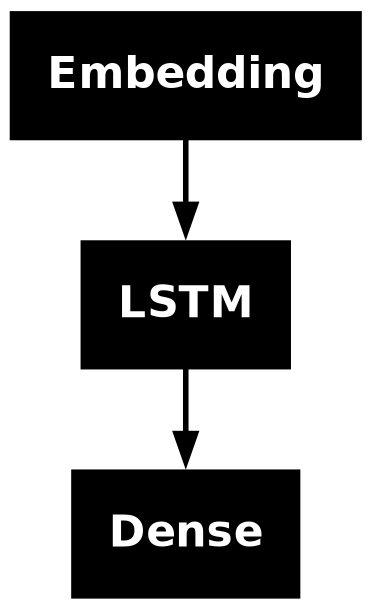

In [32]:
plot_model(model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False)